<a href="https://colab.research.google.com/github/Harishpatil0172/Airbnb-EDA-/blob/main/EDA_Airbnb_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>


In [5]:
#Mounting drive to load data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# #Manually need to install this dependencies
!pip install geopandas
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 254 kB/s 
     |████████████████████████████████| 6.3 MB 37.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


##Importing all Necessary Libraries

In [7]:
#Importing all Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

##Air_bnb Data Frame

In [8]:
#Loading Data
df_air=pd.read_csv('/content/drive/MyDrive/EDA/Airbnb NYC 2019.csv')
df_air=pd.DataFrame(df_air)

# Data Information:

* Id-Id of Each row
* Name	-Name of Each room given by host
* Host_id –Id of each Host
* Host_name –Name of each Host
* Neighbourhood group – Borough country Name
* Neighbourhood –All cities of Each Borough Country
* Latitude and Longitude –Geographical Data of Borough Country
* Room type –Name of each room type
* Price –price of each rooms
* Minimum Nights- price for Minimum nights to stay
* Number of review- Total reviews given by customer
* Last reviews- Date of last reviews given by customer
* Reviews per month –Average review rate per month
* Calculated host listing count –Count of Host listing in Airbnb 
* Availabilty_365 – Number of days availability


In [9]:
# Head of Dataframe
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
#Tail fo DataFrame
df_air.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [11]:
# Remove Unwanted Columns
df_air.drop('id',axis=1,inplace=True)

In [12]:
# Shape of DataFrame
df_air.shape

(48895, 15)

##Datatypes of Each Column

__Casting the Columns__

In [13]:
# Casting the Columns into their respective Data types
df_air['host_id']=df_air['host_id'].astype('object')
df_air['last_review']=pd.to_datetime(df_air['last_review'])

In [14]:
#Rename columns 
df_air.dtypes.reset_index().rename(columns={'index':'Column',0:'Datatype'})

,Column,Datatype
0,name,object
1,host_id,object
2,host_name,object
3,neighbourhood_group,object
4,neighbourhood,object
5,latitude,float64
6,longitude,float64
7,room_type,object
8,price,int64
9,minimum_nights,int64


##Statistical Information

In [15]:
#Getting statistical Information
columns=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
#We don't include Latitude and Longitude because they are geographical data
df_air[columns].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


_From Statistical Information we can see that price column has zero value.It is not a correct data._

In [16]:
#From statistical Anlaysis,price can't be zero so we remove those rows
df_air=df_air.loc[df_air['price']!=0]

##Cleaning Data by Removal of Null values

1. Removing __host_name__ row datas from Dataframe
2. Replacing __name__ column null values by __'Missing'__ Labels
3. __Mode Imputation__ Techniques used for __Last review__ column
4. __Median Imputation__ Techniques used for __reviews_per_month__ column

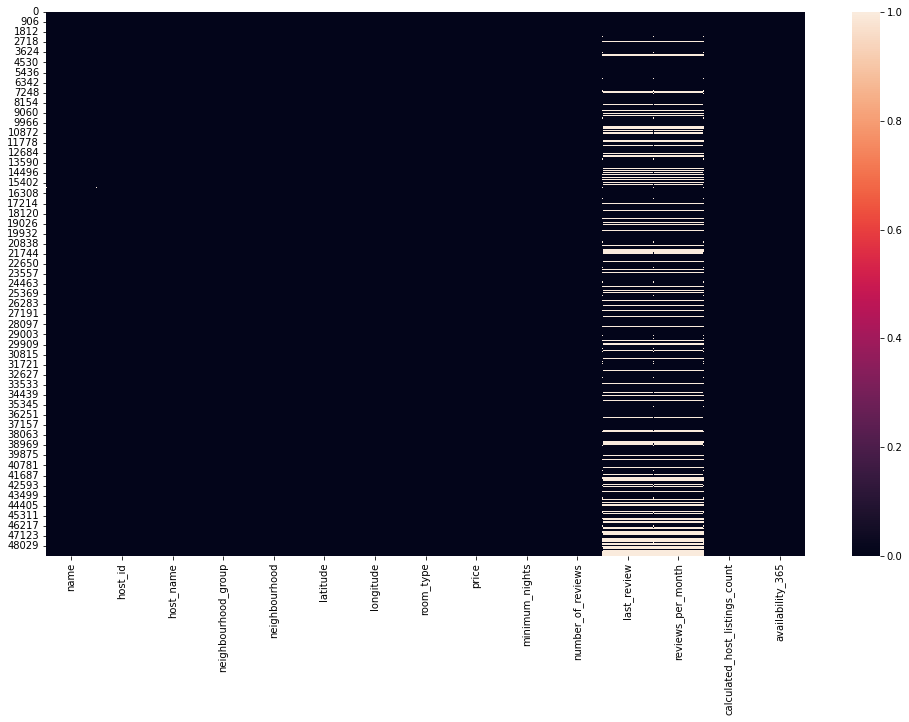

In [17]:
#Visualization of Null values using Heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df_air.isnull())

In [18]:
#Removing Null values
df_air1=df_air.copy()
#Removing host_name rows
df_air_clean=df_air1.loc[~df_air1['host_name'].isnull()]
#Replacing name column null values by 'Missing' Labels
df_air_clean['name'].replace({np.nan:'Missing'},inplace=True)
#Mode Imputation Techniques used for Last review column
df_air_clean['reviews_per_month'].fillna(df_air_clean['reviews_per_month'].median(),inplace=True)
#Median Imputation Techniques used for reviews_per_month column
df_air_clean['last_review'].fillna(df_air_clean['last_review'].mode().values[0],inplace=True)

In [19]:
#Count of Null values after Imputation
df_air_clean.isnull().sum().reset_index().rename(columns={'index':'Column',0:'Count'})

,Column,Count
0,name,0
1,host_id,0
2,host_name,0
3,neighbourhood_group,0
4,neighbourhood,0
5,latitude,0
6,longitude,0
7,room_type,0
8,price,0
9,minimum_nights,0


##Univariate Analysis

In [20]:
#Getting numeric columns
numerics = ['int32', 'int64', 'float64']
numer_col=list(df_air_clean.select_dtypes(include=numerics).columns)
#We don't include Latitude and Longitude because they are geographical data
numer_col=[i for i in numer_col if i not in ['latitude','longitude']]

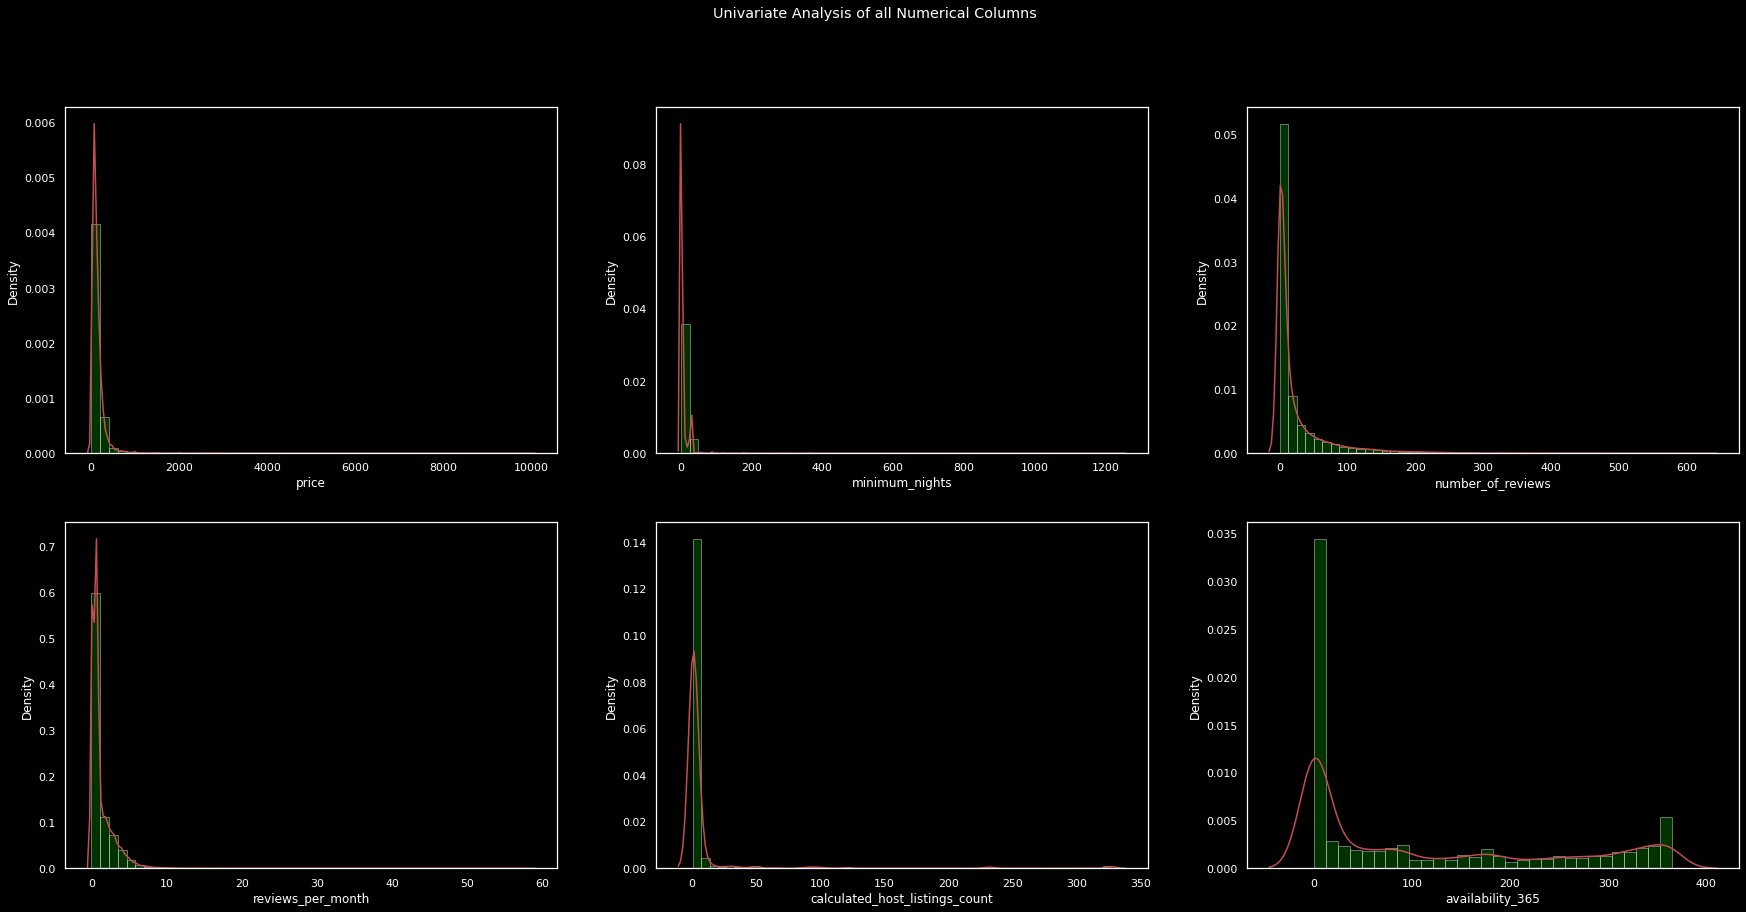

In [21]:
#setting the background style
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
#creating subplots 
fig, ax =plt.subplots(2,3,figsize=(30,14))
#setting a title of enitre graph
fig.suptitle('Univariate Analysis of all Numerical Columns')
ind,ind1=0,0
axis=0
for i in numer_col:
  if ind<3:
    #plotting graphs for first axis(row)
    sns.distplot(df_air_clean[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind])
    ind=ind+1
  elif ind>=3:
    axis=1
    #plotting graphs for second axis(row)
    sns.distplot(df_air_clean[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind1])
    ind1=ind1+1
#show figure
fig.show()


<u>From above plots all have these Characteristics</u>
* __Deviate__ from the __normal distribution__.
* It has a __positive skewness__.
* High __peakedness__.

## Bivariate Analysis or Relationship of Numerical Features

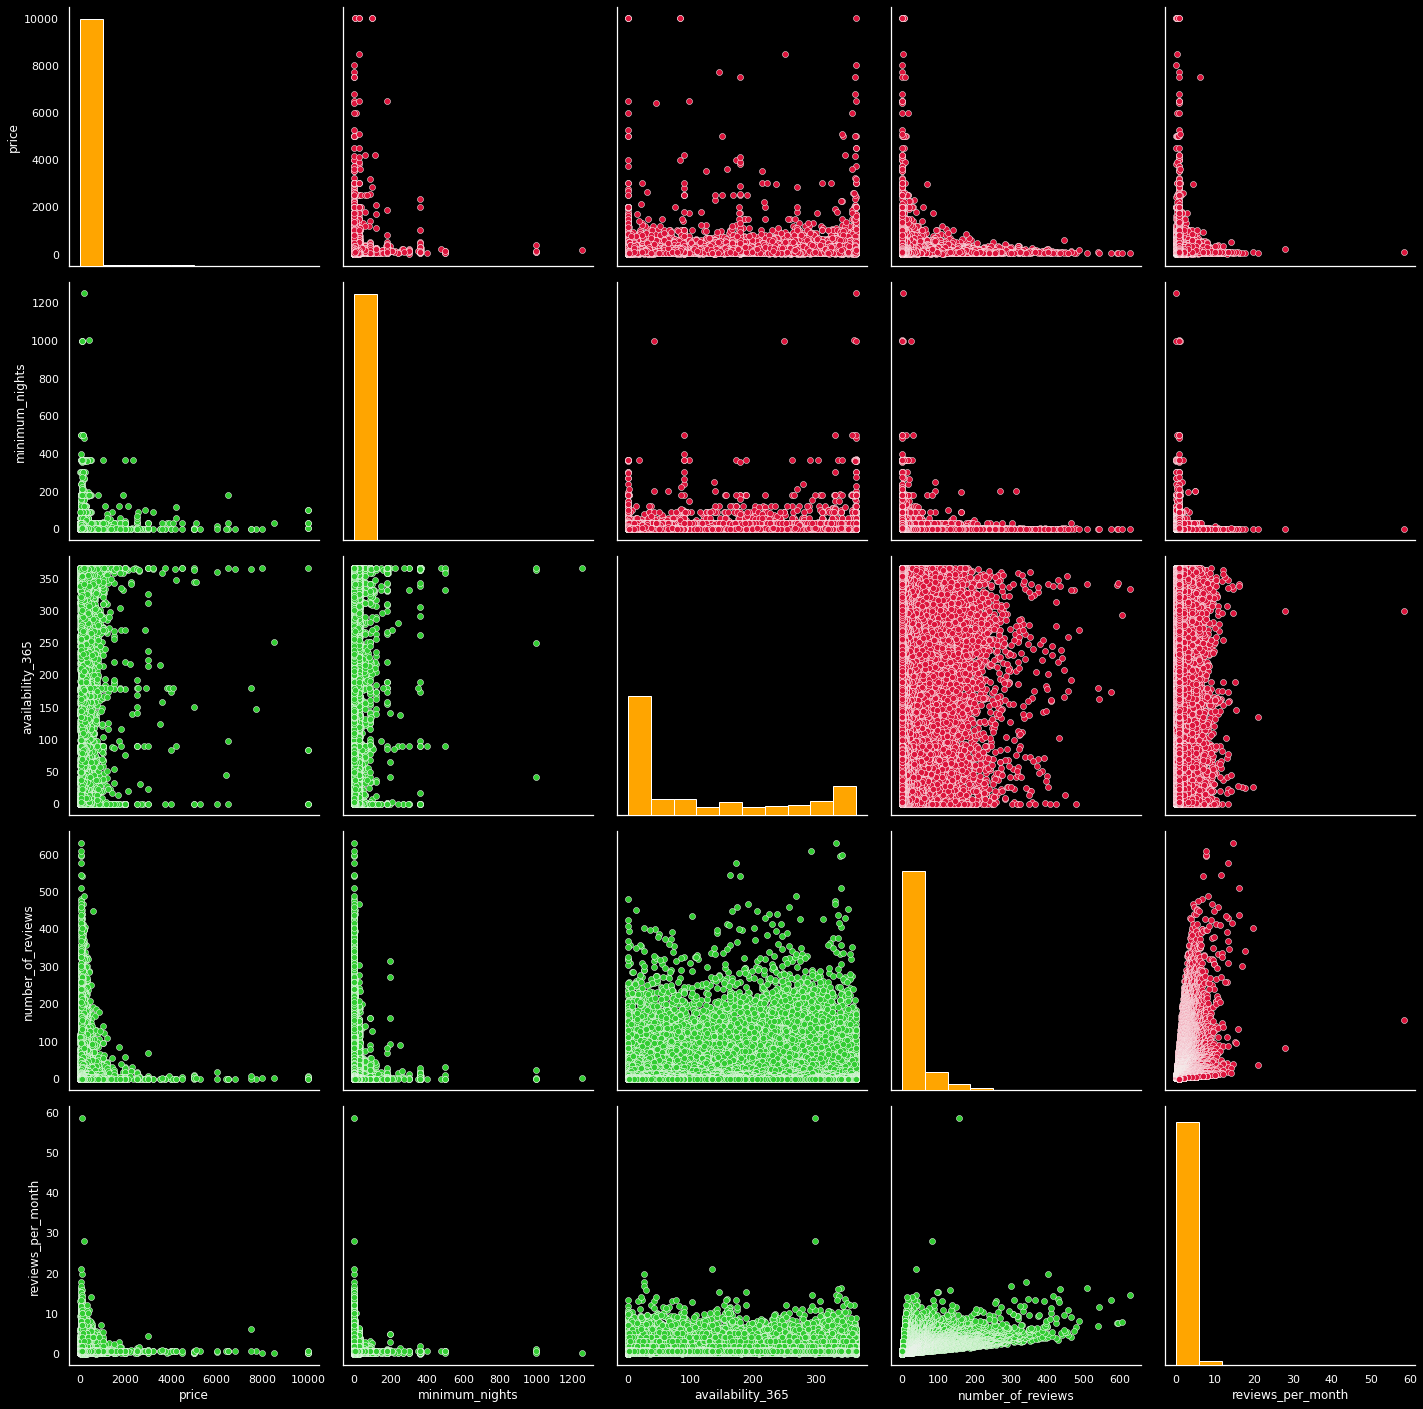

In [22]:
#Plotting a pair plot for bivariate analysis
g = sns.PairGrid(df_air_clean,vars=['price','minimum_nights','availability_365','number_of_reviews','reviews_per_month'],size=4)
#setting color
g.map_upper(sns.scatterplot, color='crimson')
g.map_lower(sns.scatterplot, color='limegreen')
g.map_diag(plt.hist, color='orange')
#show figure
plt.show()

<u>From above plot </u>
1. Number of reviews and review per month follows __linear relationship__ between them.
2. Some plot has a extreme points

##Relationship of Categorical Features

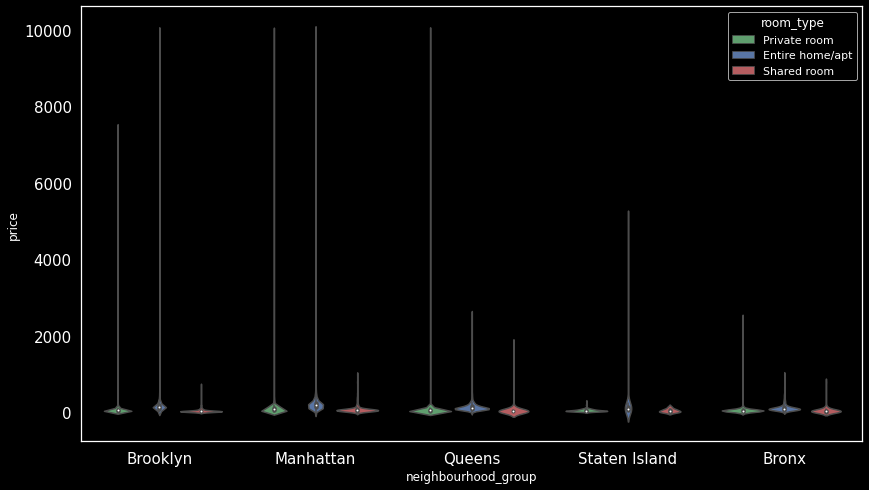

In [23]:
#setting the figure size size and fontsize
plt.figure(figsize=(14,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.axes()
ax.set_facecolor("black")
#Plotting violin graph to show the relationship between catgorical feature vs price numeric column
my_pal = {"Private room": "g", "Entire home/apt": "b", "Shared room": "r"}
sns.violinplot(x=df_air_clean['neighbourhood_group'],y=df_air_clean['price'],hue=df_air_clean['room_type'],palette=my_pal)

<u>From above plot </u>
1. In __Manhattan Shared room and Entire home/apt__ type contributes __same amount of price__. 
2. Most of the rooms are in price __below 2000__ in all __neighborhoods group__.
3. __Shared room type__ in Each Neighborhood contributes low price. In __Queens and Manhattan__ state __private room__ price contributes __equal amount__.
4. __Manhattan, Brooklyn,Queens__ has __highest__ price of rooms per night.It may be also a __extreme data points__.

## Correlation plot

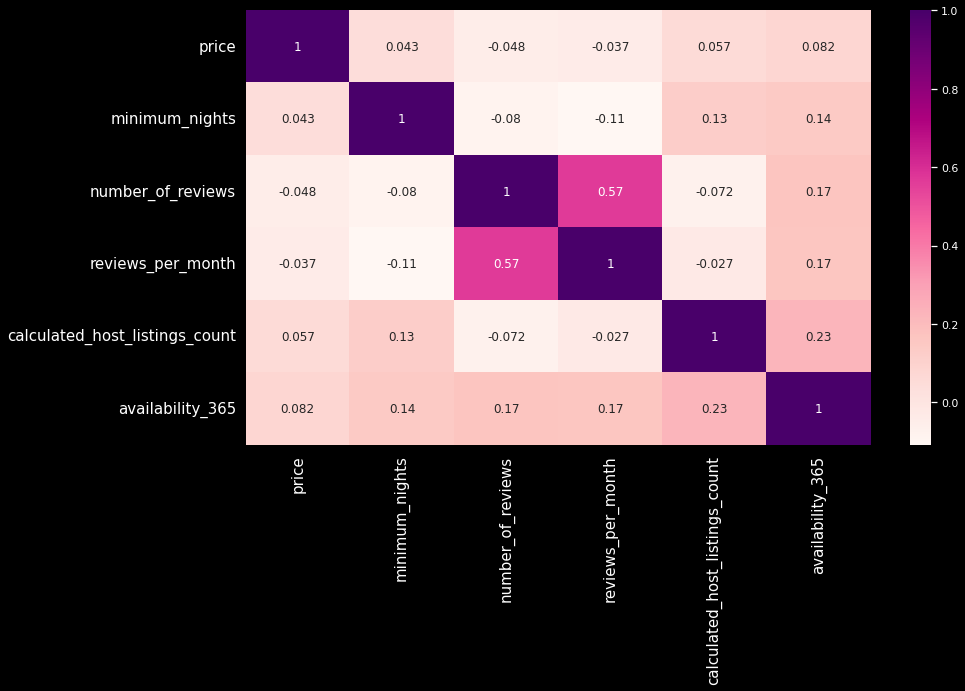

In [24]:
#setting the figure size and fontsize
plt.figure(figsize=(14,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#visualzing the corelation between all numeric features
sns.heatmap(df_air_clean[columns].corr(),annot=True,cmap='RdPu')

<u>_<b>Top 3 correlation columns</b>_</u>
1. _The __number_of_reviews__ and __reviews per_month__ columns has highest correlation of values is_ __.55__ 
2. _The __calculated_host_listings_count__ and __availability_365__ columns second highest correlation of values is_ __.23__
3. _The __reviews_per_month__ and __availability_365__ columns second highest correlation of values is_ __.19__<br>


## Exploratory Data Analysis

__Explore and analyze the data to discover key understandings (not limited to these) such as :__
1. What can we learn about different hosts and areas?
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

###<font color=blue>__1. What can we learn about different hosts and areas?__</font>

__i) How many number of hosts which has availability of 365 days i.e 24x7__

In [25]:
#Copying the original dataframe
airbnb_df_new=df_air_clean.copy()
#printing the maximum availability
airbnb_df_new["availability_365"].max()

365

In [26]:
#Fetching data host_id and availability_365 columns
availability_365_days=airbnb_df_new.loc[:,['host_id','availability_365']]
#Filtering out maximum availability of 365 days
host_available_365_days=availability_365_days[availability_365_days['availability_365']>364]
how_many_host_available_for_365_days=host_available_365_days['host_id'].nunique()
print(f"There are totally {how_many_host_available_for_365_days} which has availability of 365 days")

There are totally 894 which has availability of 365 days


__ii) Which host has the highest	number of reviews?__

In [27]:
#Grouping host_id and host_name and perform sum aggregation function
groupby_host_id_and_host_name=airbnb_df_new.groupby(['host_id','host_name']).sum()[['number_of_reviews']].reset_index()
highest_number_of_reviews=groupby_host_id_and_host_name.sort_values('number_of_reviews',ascending=False).head(10)

In [28]:
#Replacing hostid with hypen symbol at end of each id. Because Plotly assumes it has integer
highest_number_of_reviews['host_id']=highest_number_of_reviews['host_id'].astype('string').apply(lambda x:x+"_")
#plotting bar graph and styling with pattern shape
fig = px.bar(highest_number_of_reviews, y='number_of_reviews', x='host_name', text='number_of_reviews',
             color='host_id',opacity=.8,pattern_shape="host_id", 
             pattern_shape_sequence=['|', '/', '\\', 'x', '-', '|', '+', '.'],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Host has the highest number of reviews',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=13),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. ___Maya___ is the ___highest number of reviews___ with __2273__.
2. ___Brooklyn and Breakfast Len___ is the ___Second highest___ number of reviews with __2205__.

__iii) Which host has the highest number of reviews per month?__

In [29]:
#Grouping host_id and host_name and perform sum aggregation function
groupby_host_id_and_host_name=airbnb_df_new.groupby(['host_id','host_name']).sum()[['reviews_per_month']].reset_index()
highest_number_of_reviews_per_month=groupby_host_id_and_host_name.sort_values('reviews_per_month',ascending=False).head(10)
highest_number_of_reviews_per_month['reviews_per_month']=highest_number_of_reviews_per_month['reviews_per_month'].apply(lambda x:np.round(x,2))

In [30]:
#plotting bar graph and setting continuous color scale
fig = px.bar(highest_number_of_reviews_per_month, y='reviews_per_month', x='host_name',text='reviews_per_month',color='reviews_per_month',opacity=.8,color_continuous_scale='tealgrn')
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Host has the highest number of reviews per month',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=13),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. ___Sonder (NYC)___ has the ___highest number___ of reviews per month.
2. The ___next three highest___ number of reviews per month hosts are ___Blueground,Row NYC, Lakshmee___.

_Now let us come to the area, Well we can learn following points about the areas:_ 


In [31]:
#Extracing the columns which is required for analysis of area
new_airbnb_df=airbnb_df_new.loc[:,['neighbourhood_group','neighbourhood','price',]]

In [32]:
#Grouping the Neighborhood group and perform mean aggregation function
result_group=new_airbnb_df.groupby(['neighbourhood_group'])['price'].mean().reset_index()
result_group['price']=result_group['price'].apply(lambda x:np.round(x,2))
# #Sorting the results
result_group.sort_values('price',ascending=False,inplace=True)

In [33]:
# Computing Cumulative Percentage
result_group['cum_percent'] = 100*(result_group['price'].cumsum() / result_group['price'].sum())

In [34]:
#plotting bar graph price vs neighbourhood_group 
trace1 = go.Bar(
    x=result_group['neighbourhood_group'],
    y=result_group['price'],
    text=result_group['price'],
    name='price',
    marker=dict(
        color='rgb(34,163,192)'
               ),opacity=.80
)
#plotting Scatter graph cumulative percent vs neighbourhood_group 
trace2 = go.Scatter(
    x=result_group['neighbourhood_group'],
    y=result_group['cum_percent'],
    name='cum_percent',
    yaxis='y2'

)
#Merging those two plots to get parreto chart and finding the most expensive and most cheapest state 
fig = make_subplots(specs=[[{"secondary_y": True}]])
#Updating traces and layout to beautify the plot and setting the font size
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1000, title = 'Average price ditribution of Neighbourhood group',xaxis=dict(tickfont = dict(size=14),
      tickangle=-90
    ),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. ___Manhattan State___ is the ___most expensive___ one with average price of room is __196__. which contribute __31.59%__ of price distribution from total neighborhood group of __100%__ price distribution.
2. ___Bronx___ is the ___cheapest___ one with price of room is __87.59__.
2. ___Manhattan,Brooklyn and Staten Island___ cumulative price percentage is __69%__.Which lies in total price distribution of __100%__.

__i) Which is the most cheapest area and show the price distribution?__

In [35]:
result_bronx=new_airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
result_bronx['price']=result_bronx['price'].apply(lambda x:np.round(x,2))
#result_bronx=result_bronx.loc[result_bronx['neighbourhood_group']=='Bronx']
result_bronx.head()

,neighbourhood_group,neighbourhood,price
0,Bronx,Allerton,87.60
1,Bronx,Baychester,75.43
2,Bronx,Belmont,77.12
3,Bronx,Bronxdale,57.11
4,Bronx,Castle Hill,63.00


In [36]:
#Grouing the Neighborhood group of cheapest area and perform mean aggregation function
result_bronx=new_airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
result_bronx['price']=result_bronx['price'].apply(lambda x:np.round(x,2))
result_bronx=result_bronx.loc[result_bronx['neighbourhood_group']=='Bronx']
result_bronx=result_bronx[['neighbourhood','price']]
#Sorting the results
result_bronx.sort_values('price',ascending=False,inplace=True)

In [37]:
#Computing Cumulative Percentage
result_bronx['cum_percent'] = 100*(result_bronx['price'].cumsum() / result_bronx['price'].sum())

In [38]:
#plotting bar graph price vs neighbourhood_group 
trace1 = go.Bar(
    x=result_bronx['neighbourhood'],
    y=result_bronx['price'],text=result_bronx['price'],
    name='price',
    marker=dict(
        color='rgb(252, 227, 3)'
               ),opacity=.80
)
#plotting Scatter graph cumulative percent vs neighbourhood_group 
trace2 = go.Scatter(
    x=result_bronx['neighbourhood'],
    y=result_bronx['cum_percent'],
    name='cum_percent',
    yaxis='y2'
)
#Merging those two plots to get parreto chart and finding the most cheapest area
fig = make_subplots(specs=[[{"secondary_y": True}]])
#Updating traces and layout to beautify the plot and setting the font size
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 800, width = 1600,xaxis=dict(
      tickangle=-90
    ))
fig.update_layout(title='Bronx is Cheapest area and Average Price distribution of that area',autosize=False,plot_bgcolor='black',xaxis=dict(tickfont = dict(size=14)))
#show figure
fig.show()

<u>From above plot</u>
1. ___Riverdale___ is the ___most expensive___ one in the ___Bronx___ with average price of room is __442__. which contribute __9.826%__ of price distribution from total Bronx neighborhood place of __100% price distribution__.
2. ___Hunts point___ is the ___cheapest___ one with price of room is __50.5__.
2. ___Riverdale,City Island,Spuyten Duyvil,Eastchester,Unionport,Westchester square and West Farms___ cumulative price percentage is __28.73%__.Which lies in total Bronx neighborhood place price distribution of 100%.

__ii) Which is the most expensive area and show the price distribution?__

In [39]:
#Grouing the Neighborhood group of expesive area and perofrm mean aggregation function
result_manhattan=new_airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
result_manhattan['price']=result_manhattan['price'].apply(lambda x:np.round(x,2))

In [40]:
#Sorting the results
result_manhattan=result_manhattan.loc[result_manhattan['neighbourhood_group']=='Manhattan']
result_manhattan=result_manhattan[['neighbourhood','price']]
result_manhattan.sort_values('price',ascending=False,inplace=True)

In [41]:
# Computing Cumulative Percentage
result_manhattan['cum_percent'] = 100*(result_manhattan['price'].cumsum() / result_manhattan['price'].sum())

In [42]:
#plotting bar graph price vs neighbourhood_group 
trace1 = go.Bar(
    x=result_manhattan['neighbourhood'],
    y=result_manhattan['price'],text=result_manhattan['price'],
    name='price',
    marker=dict(
        color='rgb(252, 227, 3)'
               ),opacity=.80
)
#plotting Scatter graph cumulative percent vs neighbourhood_group 
trace2 = go.Scatter(
    x=result_manhattan['neighbourhood'],
    y=result_manhattan['cum_percent'],
    name='cum_percent',
    yaxis='y2'
)
#Merging those two plots to get parreto chart and finding the most expensive area
fig = make_subplots(specs=[[{"secondary_y": True}]])
#Updating traces and layout to beautify the plot and setting the font size
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 800, width = 1400,xaxis=dict(
      tickangle=-90
    ))
fig.update_layout(title='Average Price distribution of Expensive areas in Manhattan Neighborhood',autosize=False,plot_bgcolor='black',xaxis=dict(tickfont = dict(size=14)))
#show figure
fig.show()

<u>From above plot</u>
1. ___Tribecca___ is the ___most expensive___ one in the ___Manhattan___ with average price of room is __490__. which contribute __7.22%__ of price distribution from total Manhattan neighborhood place of __100% price distribution__.
2. ___Inwood___ is the ___cheapest___ one with price of room is __88.9__.
2. ___Tribecca,Battery park city,Flatiron District,NoHo and SoHo___ cumulative price percentage is __26.24%__.Which lies in total Manhattan neighborhood place price distribution of 100%.

### <font color=blue>__2. What can we learn from predictions?__ (ex: locations, prices, reviews, etc)</font>



In [43]:
#Copying Dataframe
df_eda_data=df_air_clean.copy()

__i) What can we learn from Locations and Prices?__

In [44]:
#Grouping the neighbourhood_group and neighbourhood colunms and perform mean aggregate function over price and number_of_reviews
df_loca_1=df_eda_data.groupby(['neighbourhood_group','neighbourhood'])[['price','number_of_reviews']].mean().reset_index().rename(columns={'price':'Mean_price'})
#Rounding the mean_price and number_of_reviews column
df_loca_1['Mean_price']=df_loca_1['Mean_price'].apply(lambda x:np.round(x,1))
df_loca_1['number_of_reviews']=df_loca_1['number_of_reviews'].apply(lambda x:np.round(x,1))
#Grouping the neighbourhood_group and neighbourhood colunms and perform count aggregate function over name
df_loca_2=df_eda_data.groupby(['neighbourhood_group','neighbourhood'])['name'].count().reset_index().rename(columns={'name':'count'})

In [45]:
#Merging df_loca_1 and df_loca_2
locations_data=pd.merge(df_loca_1,df_loca_2, on=['neighbourhood_group','neighbourhood'])

In [46]:
locations_data.head()

,neighbourhood_group,neighbourhood,Mean_price,number_of_reviews,count
0,Bronx,Allerton,87.6,42.9,42
1,Bronx,Baychester,75.4,44.3,7
2,Bronx,Belmont,77.1,12.3,24
3,Bronx,Bronxdale,57.1,24.1,19
4,Bronx,Castle Hill,63.0,13.1,9


__Treemap__

In [47]:
#plotting treemap of all neighborhood country vs average price
fig = px.treemap(locations_data, 
                 path=[px.Constant("NYC Airbnb"),'neighbourhood_group','neighbourhood'],
                 values='count',color='Mean_price', hover_data=['neighbourhood'],color_continuous_scale='YlGn')
#Updating traces and layout to beautify the plot 
fig.update_traces(root_color="lightgrey",textfont=dict(size=13))
fig.update_layout(title='Total Bookings of Borough Country vs Average Price',margin = dict(t=50, l=25, r=25, b=25))
#show figure
fig.show()

<u>From above plot</u>


1. ___Manhattan State___ is the ___most expensive___ one. The total count of room bookings is __21651__ and the __average price__ is __196__. The top three best places in Manhattan that customer visitng are ___Harlem,Upper west side,Hell's kitchen___. The price of that place is also less compare to other Neighborhood place. Due to this the more number of customer visits that place
2. ___Brooklyn___ stands ___second Highest___ number of bookings count. Top three places that visiors visits are ___Williamsburg Bedford-Stuyvesant,Buschwick___ and __average price__ of room is __124.44__.
3. ___Bronx___ is the ___cheapest___ one.So We can predict that ___Manhattan state___ will be the ___most busiest state___.we have to focus more in Manhattan state. And make sure that we should create ___more rooms___ in that area in order to ___gain more profit___.

__ii) What can we learn from Locations and Reviews?__


__Bubble chart__

In [48]:
locations_data.head()

,neighbourhood_group,neighbourhood,Mean_price,number_of_reviews,count
0,Bronx,Allerton,87.6,42.9,42
1,Bronx,Baychester,75.4,44.3,7
2,Bronx,Belmont,77.1,12.3,24
3,Bronx,Bronxdale,57.1,24.1,19
4,Bronx,Castle Hill,63.0,13.1,9


In [49]:
#plotting bubble chart for all reviews in neighborhood area
fig = px.scatter(locations_data, x="count", y="number_of_reviews",
	         size="number_of_reviews", color="neighbourhood_group",text='number_of_reviews',
                 hover_name="neighbourhood", log_x=True, size_max=80,opacity=.75,color_discrete_sequence=px.colors.qualitative.Set1)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=10,color='White'))
fig.update_layout(title='Number of reviews for Each Neighborhood place',autosize=False,yaxis=dict(
        showgrid=True,gridcolor='rgb(26, 173, 102)'),xaxis=dict(
        showgrid=True,gridcolor='rgb(26, 173, 102)'),
    width=1400,
    height=600,plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>


1. The bubble chart describes that in ___Staten island___ state the ___Silver lake area___ has most ___number of reviews___ with __118.5__. 
2. It says that the customers which stayed in that neighborhood place rooms. The customer may have some complaints regarding room service or some of them may be happy with service. ___To improve visitors and customer satisfication___ in Staten Island we have to work on the ___customers negative feedback___.

###<font color=blue>__3.Which hosts are the busiest and why?__</font>

In [50]:
host_id11=df_eda_data[['host_id','host_name']].value_counts().reset_index().head(10)
host_id11.rename(columns={'host_id':'Host_id','host_name':'Host_name',0:'Count'},inplace=True)
host_id11['Host_id']=host_id11['Host_id'].astype('string').apply(lambda x:x+"_")
host_id11.head()

,Host_id,Host_name,Count
0,219517861_,Sonder (NYC),327
1,107434423_,Blueground,232
2,30283594_,Kara,121
3,137358866_,Kazuya,103
4,12243051_,Sonder,96


In [51]:
#Counting numer of time each host_id occur
host_id11=df_eda_data[['host_id','host_name']].value_counts().reset_index().head(10)
host_id11.rename(columns={'host_id':'Host_id','host_name':'Host_name',0:'Count'},inplace=True)
#Replacing hostid with hypen symbol at end of each id. Because Plotly assumes it has integer
host_id11['Host_id']=host_id11['Host_id'].astype('string').apply(lambda x:x+"_")
#plotting bar graph and styling with pattern shape
fig = px.bar(host_id11, y='Count', x='Host_id', text='Count',color='Host_name',opacity=.8,pattern_shape="Host_id", 
             pattern_shape_sequence=['x', '/', '\\', 'x', '-', '|', '+', '.'],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Busiest Hosts',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot </u>
1. we can see that ___Sonder(NYC)___ is ___most busiest___ host with total count of bookings is __327__

__i) why the above host has a highest bookings count?__

In [52]:
#Replacing hostid with " "at end of each id.
host_id_list=list(host_id11['Host_id'].apply(lambda x:int(x.replace('_',""))))

In [53]:
df_eda_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.72,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [54]:
df_eda_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.72,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [55]:
#Fitlering out top hosts data
df_anal=df_eda_data.loc[df_eda_data['host_id'].isin(host_id_list)]

In [56]:
df_anal.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1386,"2 BED TriBeCa, Beautiful-Renovated!",1475015,Mike,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,2015-10-31,0.03,52,116
1454,ELEGANT MIDTOWN EAST STUDIO E.52 ST,1475015,Mike,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,2016-12-31,0.05,52,358
1455,32nd St & Lexington Ave / Doorman Beautiful St...,1475015,Mike,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342
1456,COLUMBUS CIRCLE~FULLY FURNISHED!!!,1475015,Mike,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,2016-08-15,0.04,52,223
1457,GRAMERCY PARK~FURNISHED E.20's ST P,1475015,Mike,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,2018-08-15,0.05,52,363


In [58]:
#Grouping the host_id,host_name and neighbourhood_group columns and perform sum aggregate funtion over number_of_reviews
df_son_1=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['number_of_reviews'].sum().reset_index()
#Grouping the host_id,host_name and neighbourhood_group columns and perform mean aggregate funtion over price
df_son_2=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['price'].mean().reset_index()

In [59]:
#Fetching all neighborhoods area for each host and counting them
df_son_3=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['neighbourhood'].apply(set).reset_index()
df_son_3['neighbourhood_count']=df_son_3['neighbourhood'].apply(lambda x:len(x))

In [60]:
#Merging df_son_1 and df_son_2 
df=pd.merge(df_son_1,df_son_2,on=['host_id','host_name','neighbourhood_group'])
#Merging df and df_son_3
df1=pd.merge(df,df_son_3,on=['host_id','host_name','neighbourhood_group'])

In [61]:
#plotting treemap of all Busiest Hosts Rental place in Each Neighborhood Country vs Number of reviews
fig = px.treemap(df1, 
                 path=[px.Constant("Top Host rooms in Each Neighborhood Country"),'host_name','neighbourhood_group'],
                 values='price',color='number_of_reviews', hover_data=['neighbourhood_count'],color_continuous_scale='blugrn')
#Updating traces and layout to beautify the plot 
fig.update_traces(root_color="lightgrey",textfont=dict(size=13))
fig.update_layout(title='Busiest Hosts Rental place with bookings count and number of reviews',margin = dict(t=50, l=25, r=25, b=25))
#show figure
fig.show()

<u>From above plot</u>
1. The host **Sonder(NYC)** has highest ***number of reviews***. This host room is located in ***Manhattan*** group which is the ***expensive location*** and ***average price*** of this host is ***253*** which is ***less*** compared to other host like ***Blueground,ken,kara,Pranjal***.<br>
2. The host **Blueground** is the ***second highest number of bookings***.The review is ***less*** compared to other hosts.This host room is located in ***Manhattan*** and ***Brooklyn*** group which is the ***expensive location*** and ***average price*** of this host is ***598*** which is little bit higher.Blueground host has a more ***number of booking*** becuase this host has a ***total of 21 neighbourhood area from 19 of Manhattan and 2 of Brooklyn***.

###<font color=blue>__4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?__</font>

In [62]:
#Copying the Orignial Datframe
df_nyc=df_air_clean.copy()
#Converting latitude and longitude to geographical points
points=df_nyc.apply(lambda x:Point(x.longitude,x.latitude),axis=1)
geodf_nyc=gpd.GeoDataFrame(df_nyc,geometry=points)
#Using df_nyc data for plotting map
nbhoods = pd.read_csv('/content/drive/MyDrive/EDA/nynta.csv')
nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)
#Since it is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)
nbhoods.drop('the_geom',axis=1,inplace=True)
#Now converting the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')

(-74.28337047814922,
 -73.67222994821337,
 40.475144526098404,
 40.936503646095986)

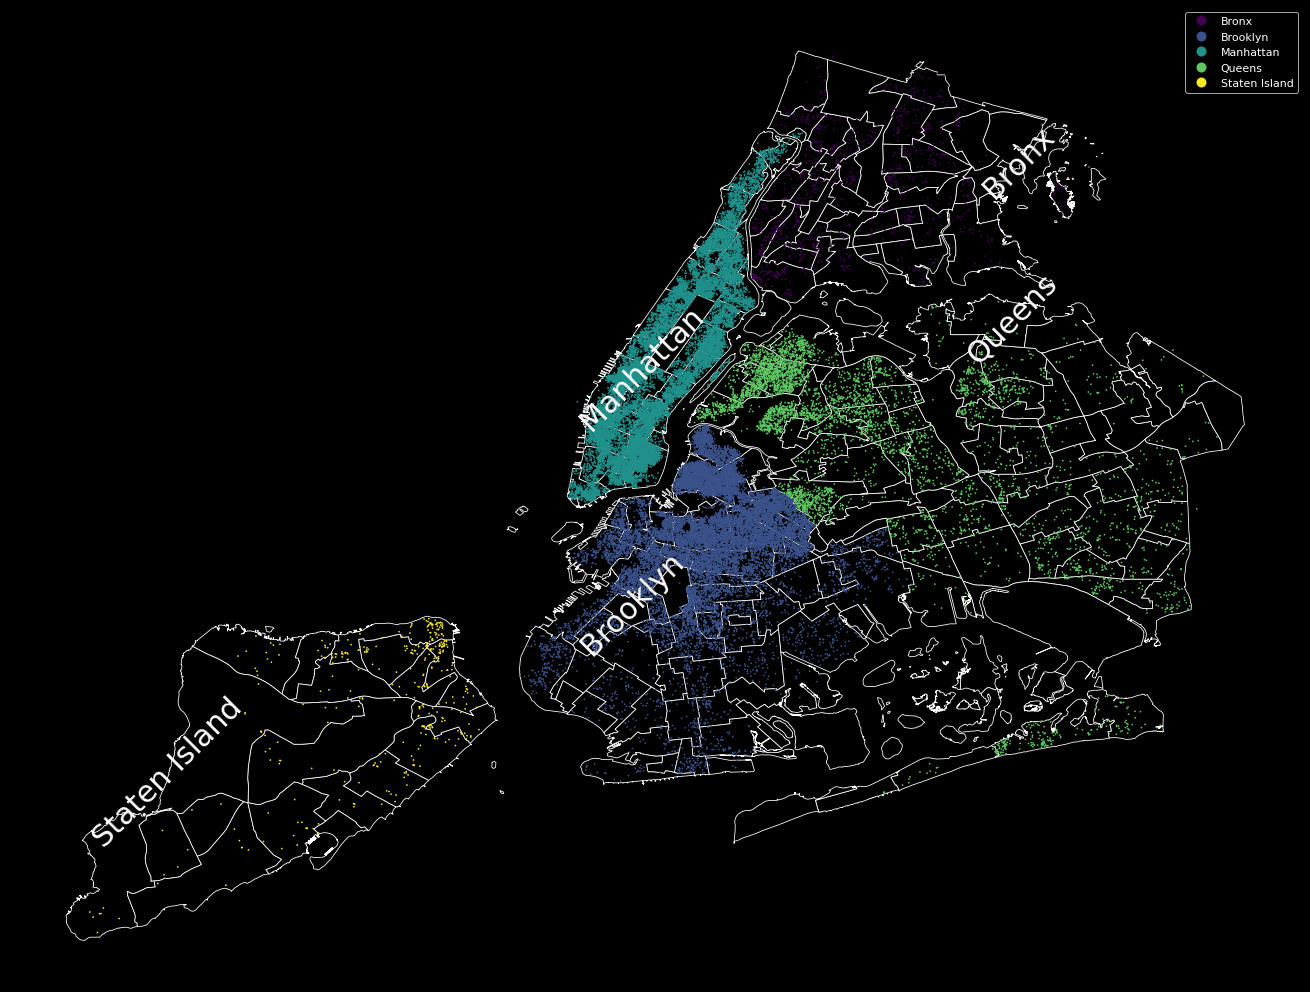

In [63]:
#plotting map of neighbourhood_group column to see noticeable difference of traffic among different areas 
fig,ax = plt.subplots(1,1, figsize=(28,18))
#setting a baseplot of neighborhoods country by white edge color 
base=nbhoods.plot(color='black',edgecolor='white',ax=ax,linewidth=.8)
c=list(df_eda_data.neighbourhood_group.unique())
#Updating a Neighborhood country to the map plot
for idx, row in nbhoods.iterrows():
    if row['BoroName'] in c:
        plt.annotate(s=row['BoroName'], xy=row.geom.centroid.coords[0],
                     horizontalalignment='center',color='white',rotation=45, size=30)
        c.remove(row['BoroName'])
    else:
        pass
#setting a map plot by scattering of each borough country
geodf_nyc.plot(column='neighbourhood_group',ax=base,markersize=.5,legend=True,cmap='viridis')
base.axis('off')

<u>_Reasons for traffic in Neighborhood group_</u>

In [64]:
#Grouping the neighbourhood_group columns and perform sum aggregate funtion over number_of_reviews 
d1=df_eda_data.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
#Grouping the neighbourhood_group columns and perform mean aggregate funtion over price 
d2=df_eda_data.groupby(['neighbourhood_group'])['price'].mean().reset_index()
#Counting number of each neighborhood group 
d3=df_eda_data['neighbourhood_group'].value_counts().reset_index().rename(columns={'index':'neighbourhood_group','neighbourhood_group':'Count_of_bookings'})

In [65]:
#Merging d1 and d2
ddf=pd.merge(d1,d2,on=['neighbourhood_group'])
#Merging ddf and d3
ddf_=pd.merge(ddf,d3,on=['neighbourhood_group'])

In [66]:
#plotting bar graph and styling continuous color scale
fig = px.bar(ddf_, y='price', x='neighbourhood_group',color='number_of_reviews', text='Count_of_bookings',opacity=.8,color_continuous_scale='tealgrn')
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Neighborhood Traffic',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. It tells that ___Manhattan and Brooklyn___ has more __number of bookings__ and __total reviews__. The customer give __more number of reviews__ specifically in this two State. Because they provide ___good rooms___ and ___services to customer___ and there has ___more number of neighborhood place___ to visit compare to other Neighborhood State.
2. In order to increase the customers in Staten Island Queens. The ___host need to give more discounts and good quality of service to customers___. This will lead to ___increase___ the ___chance of high number of bookings___.

## __Custom Analysis__

#### Hi My name is __Vidhyut__ and I'm a __traveller__. I'm moving to __Queens,Brooklyn, Manhattan__ Neigborhoods Group to explore it. I don't know some information and living cost about those places. As you are a DataScientist explore the given Dataset and answer some specific Question which mentioned below.

###<font color=blue>__1).I'm choosen Queens Neigborhood to live there for 20 days.Whether it will be cheaper to stay there compare to other neighborhoods.__</font>

In [67]:
#Filtering out the Brooklyn,manhattan,Queens borough country data from Dataframe
df_new=df_eda_data.loc[df_eda_data['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens'])]
#plotting bar graph and styling with pattern shape
fig = px.bar(x='neighbourhood_group',y='price',data_frame=df_new.groupby(['neighbourhood_group']).mean().reset_index(),text='neighbourhood_group',color='neighbourhood_group',opacity=.8,pattern_shape="neighbourhood_group", pattern_shape_sequence=[".", "x", "+"],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Neighborhood price of Manhattan,Brooklyn and Queens',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. The __Queen__ neighborhood price of room is __99.53__ is __cheaper__ to stay compare to other neigborhood __Manhattan and Brooklyn__ based on the __room prices__.

###<font color=blue>__2.If Queens Neigborhood is cheaper,Then which room type can I prefer and area(neighborhood) best to visit  at Affordable cost. If not what is the alternative option to stay at other neighborhood group with room type and places at best cost.__</font>

In [68]:
#Filtering out only Queens borough country data from Dataframe
queen_data=df_new.loc[df_new['neighbourhood_group']=='Queens']
#plotting bar graph for Queens Borough country vs Room type
fig = px.bar(x='neighbourhood',y='price',data_frame=queen_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7,color_discrete_sequence=px.colors.qualitative.Set1)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_layout(title='Queens Room type and its places to visit at affordable Cost',yaxis_title='Average_Price_Per_Night',xaxis=dict(titlefont = dict(size=14),tickfont = dict(size=12)),yaxis=dict(titlefont = dict(size=14),tickfont = dict(size=12),
        showgrid=False,
        showticklabels=True),plot_bgcolor='black',autosize=False,
    width=1600,
    height=800)
#show figure
fig.show()

<u>From above plot</u>
1. The Nighborhood of __South Ozone park__ with Shared room type is best place to visit at __affordable cost__.Because we can see from graph the __average price__ for that room type is __31$__.

###<font color=blue>__3.Once I stayed for  20 days.I had a balance amount of Rs.15000.Then I decided to stay other 10 days at Staten Island.Is this amount is sufficient only for room expenses?__</font>


In [69]:
#Filtering out only Staten Island borough country data from Dataframe
df_staten=df_eda_data.loc[df_eda_data['neighbourhood_group'].isin(['Staten Island'])]
#Calculating avg price for 10 days
price_=round(df_staten['price'].mean()*10,0)

In [70]:
if price_<=15000:
    print(f'The average amount to stay Rooms in Staten Island for 10 days is {price_}. Your amount is more Sufficient to stay there.')
else:
    print("The amount exceeds your budget plan for room in Staten Island.")

The average amount to stay Rooms in Staten Island for 10 days is 1148.0. Your amount is more Sufficient to stay there.


###<font color=blue>__4.If yes, Then which Room type is prefer to live luxury life at Staten Island.I don't know the best place to visit in Staten Island.You guys explore it and tell me the best 7 places to visit.__</font>

In [71]:
#Grouping Room type of Staten Island and perform aggregate of mean over price column
da_val=df_staten.groupby(['room_type'])['price'].mean().to_dict()
colors = ['gold', 'mediumturquoise', 'darkorange']
#plotting donut chart
fig = go.Figure(data=[go.Pie(text=list(da_val.keys()),labels=list(da_val.keys()), 
                       values=list(da_val.values()),hole=.3)])
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='black'),marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title='Luxury Rooms in Staten Island and its Room type')
#show figure
fig.show()

<u>From above plot</u>
1. The __Entire home/apt__ room type is __luxury__ compare to other room type.In here the __average cost__ is __173$__ per night to stay in there.

###<font color=blue>__5.What is the total number of reviews given for Each Month in the year of 2019 at Staten Insland with different Room type?__</font>

In [72]:
#Extracting month from last_review column and create new column last_review_month
df_staten['last_review_month']=df_staten['last_review'].apply(lambda x: x.month)
#Extracting year from last_review column and create new column last_review_year
df_staten['last_review_year']=df_staten['last_review'].apply(lambda x: x.year)

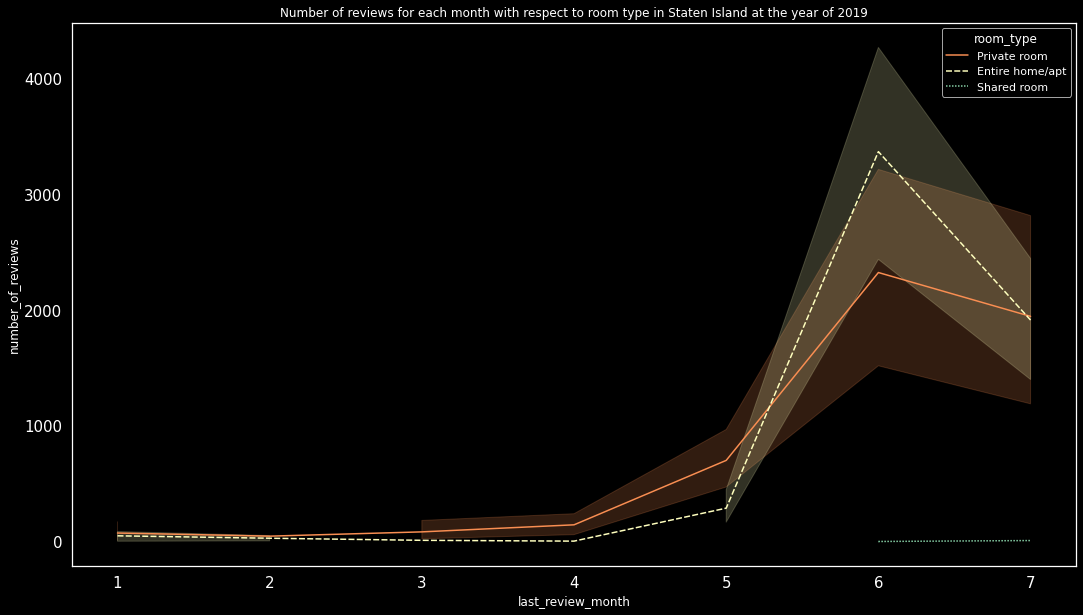

In [73]:
#Filtering out necessary columns required for analysis
df_staten_date=df_staten[['number_of_reviews','room_type','last_review_month','last_review_year']]
df_staten_date_2019=df_staten_date.loc[df_staten_date['last_review_year']==2019]
#setting figure size and font size
plt.figure(figsize=(18,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Number of reviews for each month with respect to room type in Staten Island at the year of 2019')
ax = plt.axes()
ax.set_facecolor("black")
#plotting line plot
sns.lineplot(x=df_staten_date_2019['last_review_month'],y=df_staten_date_2019['number_of_reviews'],hue=df_staten_date_2019['room_type'],
             style=df_staten_date_2019['room_type'],estimator=np.sum,palette='Spectral')

<u>From above plot</u>


1.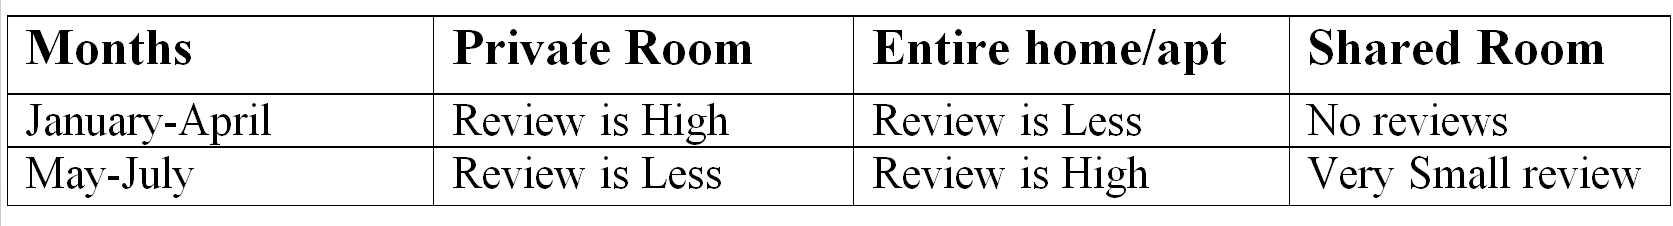

2. We can also say that at the months between **May and July** is a **Season time** in **Staten Island** at the year of __2019__.
3. The __Entire home/apt__ Roomtype has __more number of reviews__ from customers in __Staten Island__ in the year of __2019__.


###<font color=blue>__6.I'm really excited and satisfied that room provided in Staten Island which was really clean and awesome.I like to know the host name to thank and give positive feedback.__</font>

In [102]:
#Extracting Roomtype of Entire hom/apt from Staten Island Data
df_host=df_staten.loc[df_staten['room_type']=='Entire home/apt']
#Filtering out necessary columns required for analysis
df_host_new=df_host[['name','host_id','host_name','price','minimum_nights']]
#Creating new column of 10 day price
df_host_new['total_10_day_price']=df_host_new['price']*10

In [108]:
#plotting bar graph and styling with pattern shape
fig = px.bar(x='host_name',y='total_10_day_price',data_frame=df_host_new.sort_values('total_10_day_price',ascending=False).head(10),
             text='total_10_day_price',color='name',opacity=.8,pattern_shape="name", 
             pattern_shape_sequence=['x', '/', '\\', 'x', '-', '|', '+', '.'],
             color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='white'),textposition='outside')
fig.update_layout(title='10 days price of Luxury Hotels in Staten Island with their Host Names ',yaxis_title='10 days price',xaxis=dict(titlefont = dict(size=15),
  tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),autosize=False,
    width=1500,
    height=600,plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. __Alissa__ host has __most expensive__ room type of __Entire home/apt__ with price of __50000__ for __10 days__.
2. The __Customer budget__ is only __below 15000__.So Customer __decided to choose Anastasios__ host room. Which the customer budget is matching with Anastasios budget of 10days price.

In [109]:
df_host_new.head()

,name,host_id,host_name,price,minimum_nights,total_10_day_price
598,Sunny cozy multileveled apartment!,1177947,Marina,75,6,750
702,"Oceanview,close to Manhattan",1360198,Marina,250,2,2500
704,"Budget stay, near transportation",1360198,Marina,125,2,1250
1424,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,299,3,2990
1621,"Wedding guests accommodations, 3-7 bedrooms",1360198,Marina,625,4,6250


In [111]:
#printing the host_name and Rental place of Vidhyut Stayed in 10 days at Staten Island to thank the Host
index=[]
for i,j in df_host_new.iterrows():
    if j['price']*10>10000 and j['price']*10<=15000:
        index.append(i)
        index.append(j['name'])
        index.append(j['host_name'])
        index.append(j['price'])

print(f"The Vidhyut stayed at {index[1]} is a name of Rental Place and price of that room is {index[-1]*10} for 10 days.The host_name is {index[-2]}")

The Vidhyut stayed at Central Hall Colonial with Free Parking Bus EXP NY is a name of Rental Place and price of that room is 12500 for 10 days.The host_name is Anastasios


###Cleaning Data by Outliers Detection and Removal

__Outlier Detection and Removal using IQR Technique__

In [78]:
#copying the data for outlier detection
before_outlier=df_air_clean[['price','number_of_reviews','calculated_host_listings_count','minimum_nights']].copy()
columns=['price','number_of_reviews','calculated_host_listings_count','minimum_nights']

In [112]:
#Creating funtion to remove outlier using Inter Quantile Range
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
for i in columns:
    lowerbound,upperbound = outlier_treatment(df_air_clean[i])
    df_air_clean.drop(df_air_clean[ (df_air_clean[i] > upperbound) | (df_air_clean[i] < lowerbound) ].index , inplace=True)

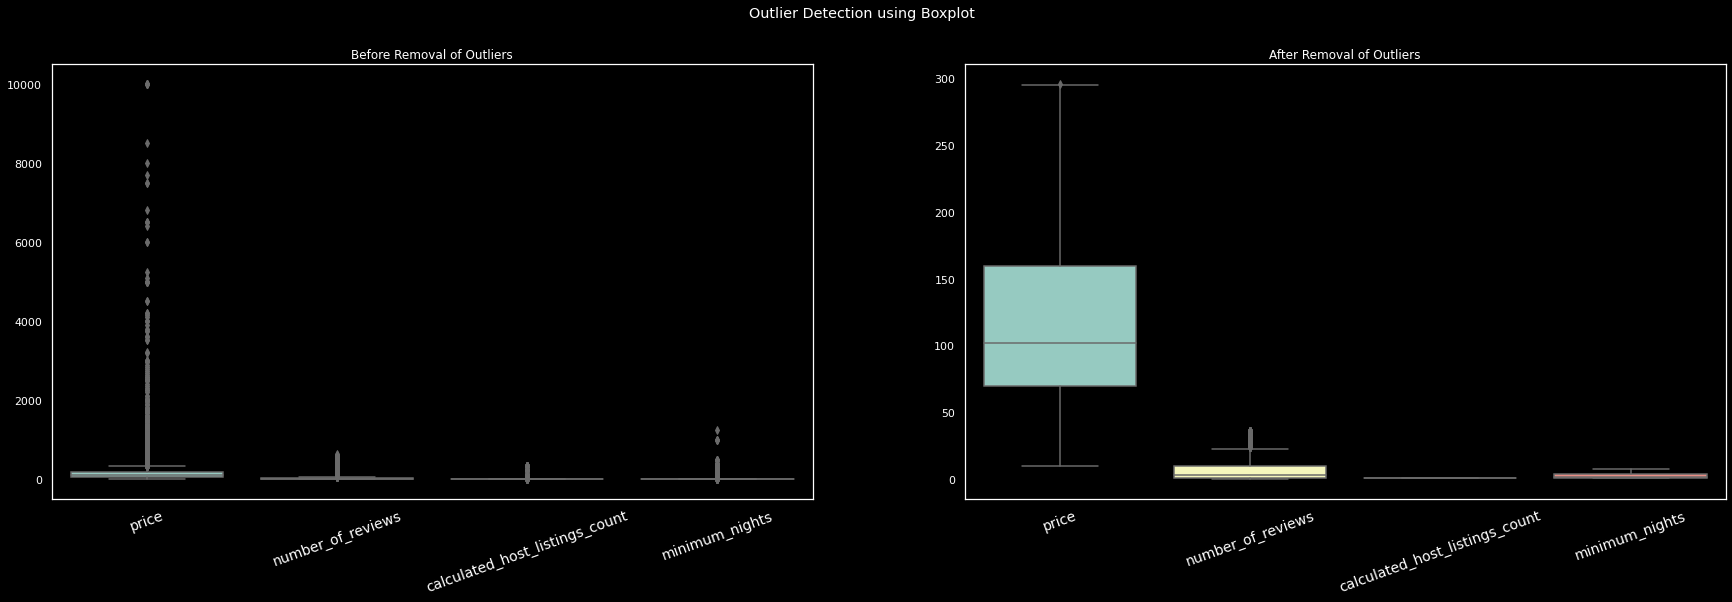

In [113]:
#Setting subplots
fig, ax =plt.subplots(1,2,figsize=(30,8))
#ploting boxplot of before outlier removal
a=sns.boxplot(data=before_outlier,ax=ax[0])
fig.suptitle('Outlier Detection using Boxplot')
a.set(title='Before Removal of Outliers')
a.set_xticklabels(a.get_xticklabels(),rotation=20,size=14)
#ploting boxplot of after outlier removal
b=sns.boxplot(data=df_air_clean[columns],ax=ax[1])
b.set_xticklabels(a.get_xticklabels(),rotation=20,size=14)
b.set(title='After Removal of Outliers')
#show figure
fig.show()

###Statistical Tests

> Perform a statistical test :- Whether the average price of rooms across all neighbourhood groups is similar or not



In [114]:
#Grouping price and neighbourhood group so that we can see which two values are close for hypothesis testing.
group1 = df_air_clean[['price','neighbourhood_group']].groupby(by='neighbourhood_group')
group1.mean().reset_index()

,neighbourhood_group,price
0,Bronx,78.080435
1,Brooklyn,107.491959
2,Manhattan,141.697183
3,Queens,95.452780
4,Staten Island,101.090164


In [115]:
#Grouping by respective Cities B-Bronx,Q-Queens
B = group1.get_group('Bronx')
Q = group1.get_group('Queens')

In [118]:
#Taking mean and standard deviation of the groups.
m1 = B.mean()
s1 = B.std()

m2= Q.mean()
s2 = Q.std()

print('Mean for price in Bronx {} \n Mean for price in Queens {}'.format(m2,m1))
print('Std for price in Bronx {} \n Std for price in Queens {}'.format(s2,s1))

Mean for price in Bronx price    95.45278
dtype: float64 
 Mean for price in Queens price    78.080435
dtype: float64
Std for price in Bronx price    51.587477
dtype: float64 
 Std for price in Queens price    40.924502
dtype: float64


In [120]:
from scipy import stats
#length of groups
n1 = len(B)
n2= len(Q)
print(n1,n2)

#Degree of freedom
dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])



460 2266
dof 2724
SP_2 = price    1841.03435
dtype: float64
SP price    42.907276
dtype: float64
tvalue -7.917233501490703


In [121]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.9608352428860063

In [122]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9608352428860059

As t_value is not in the range so rejecting null hypothesis


> price of rooms in Bronx and Queens are not equal



>Hypothesis Testing
H0 : price of rooms in Brooklyn and Staten Island are equal.
HA : price of rooms in Brooklyn and Staten Island are not equal

In [123]:
#Grouping by respective Cities Br-Brooklyn,Staten-Staten Island
Br = group1.get_group('Brooklyn')
Staten = group1.get_group('Staten Island')

In [125]:
#Taking mean and standard deviation of the groups.
m1 = Br.mean()
s1 = Br.std()

m2= Staten.mean()
s2 = Staten.std()

In [126]:
#length of groups
n1 = len(Br)
n2= len(Staten)
print(n1,n2)

#degree of freedom
dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


9576 122
dof 9696
SP_2 = price    2595.939141
dtype: float64
SP price    50.95036
dtype: float64
tvalue 1.3790671468768108


In [127]:
# t-distribution
stats.t.cdf(t_val[0],dof) 

0.9160470692357834

In [128]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.960208679502592

In [129]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602086795025915

As t_value is not in the range So rejecting null hypothesis


> price of rooms in Brooklyn and Staten Island are not equal

In [130]:
Queens = group1.get_group('Queens')
#Taking mean and standard deviation of the groups.
m1 = Queens.mean()
s1 = Queens.std()
m2= Staten.mean()
s2 = Staten.std()

In [131]:
#length of groups
n1 = len(Queens)
n2= len(Staten)
print(n1,n2)


2266 122


In [132]:
#degree of freedom
dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)
sp = np.sqrt(sp_2)
print('SP',sp)

dof 2386
SP_2 = price    2590.538851
dtype: float64
SP price    50.897336
dtype: float64


In [133]:
# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

tvalue -1.1917227982303298


In [134]:
# t-distribution
print(stats.t.ppf(0.025,dof))
print(stats.t.ppf(0.975,dof))

-1.9609587266276254
1.960958726627625


As t_value is in the range so accepting null hypothesis

>price of rooms in Queens and Staten Island are equal


**Statistical test**
> if they are related what should be case ?


    - there are speicific kind of rooms related to neighbourhood groups
    - assocation


>if they are not related what should be case ?

    - room type does not depend on neighbourhood groups
    - independent
    
- HO: No Related (no association)
    - alpha > 0.05
- HA: Realted (association)
    - alpha < 0.05

## $ChiSquare = \frac{\sum (f_e - f_o)^2} { f_e} $

In [135]:
#Creating a crosstab of neighbourhood groups and room types.
comp_loc = pd.crosstab(df_air_clean['neighbourhood_group'],df_air_clean['room_type'],margins=True)
comp_loc

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,160,273,27,460
Brooklyn,4723,4756,97,9576
Manhattan,5702,3508,162,9372
Queens,994,1218,54,2266
Staten Island,74,47,1,122
All,11653,9802,341,21796


In [136]:
#Total No. of rooms
N = comp_loc.iloc[-1,-1]
N

21796

In [137]:
#rows and columns of crosstab we have created
rows,cols  = comp_loc.shape
rows,cols

(6, 4)

In [138]:
#Finding e of each row and column
E_ij =np.zeros((rows-1,cols-1))
for i in range(cols-1):
    for j in range(rows-1):
        e = (comp_loc.iloc[-1,i] * comp_loc.iloc[j,-1])/N
        print('For {} row and {} col the e ={}'.format(j,i,e))
        E_ij[j,i] = e

For 0 row and 0 col the e =245.93411635162414
For 1 row and 0 col the e =5119.706735180767
For 2 row and 0 col the e =5010.6403009726555
For 3 row and 0 col the e =1211.4928427234354
For 4 row and 0 col the e =65.22600477151771
For 0 row and 1 col the e =206.86915030280787
For 1 row and 1 col the e =4306.476050651496
For 2 row and 1 col the e =4214.734079647642
For 3 row and 1 col the e =1019.055423013397
For 4 row and 1 col the e =54.86529638465773
For 0 row and 2 col the e =7.196733345567994
For 1 row and 2 col the e =149.8172141677372
For 2 row and 2 col the e =146.6256193797027
For 3 row and 2 col the e =35.45173426316755
For 4 row and 2 col the e =1.908698843824555


In [139]:
# O_ij
O_ij =  comp_loc.iloc[:-1,:-1].values

In [140]:
#o_ij.shape and E_ij.shape
O_ij.shape, E_ij.shape

((5, 3), (5, 3))

In [141]:
def chisquare_value(fe,fo):
    chisqure = np.square(fe-fo)/fe
    return chisqure

In [142]:
chisqure_list = []
n_row,n_col = O_ij.shape
for i in range(n_row):
    for j in range(n_col):
        chisqure_list.append(
            chisquare_value(E_ij[i,j], O_ij[i,j]))

In [143]:
#Finding chisquare value
chisquare_value = sum(chisqure_list)
print('chisquare_value =',chisquare_value)

chisquare_value = 507.7827217976274


In [144]:
#print dof
DOF = (n_row-1)*(n_col-1)
print('Degree of Freedom =',DOF)

Degree of Freedom = 8


In [145]:
#Using stats module to determine alpha value
alpha = stats.chi2.pdf(chisquare_value,DOF)
pval = 1-alpha

In [146]:
#print the alpha
print('the alpha =',alpha)

the alpha = 7.432680816063046e-105


__Since alpha is less than 0.05 hence , neighbourhood_group and room type are related__

###__Transformation of Important Numeric columns in to Normal Distribution using Central Limit Theorem__

In [147]:
#Numerical columns need to be transformed
num_col=['price','number_of_reviews','calculated_host_listings_count','minimum_nights']

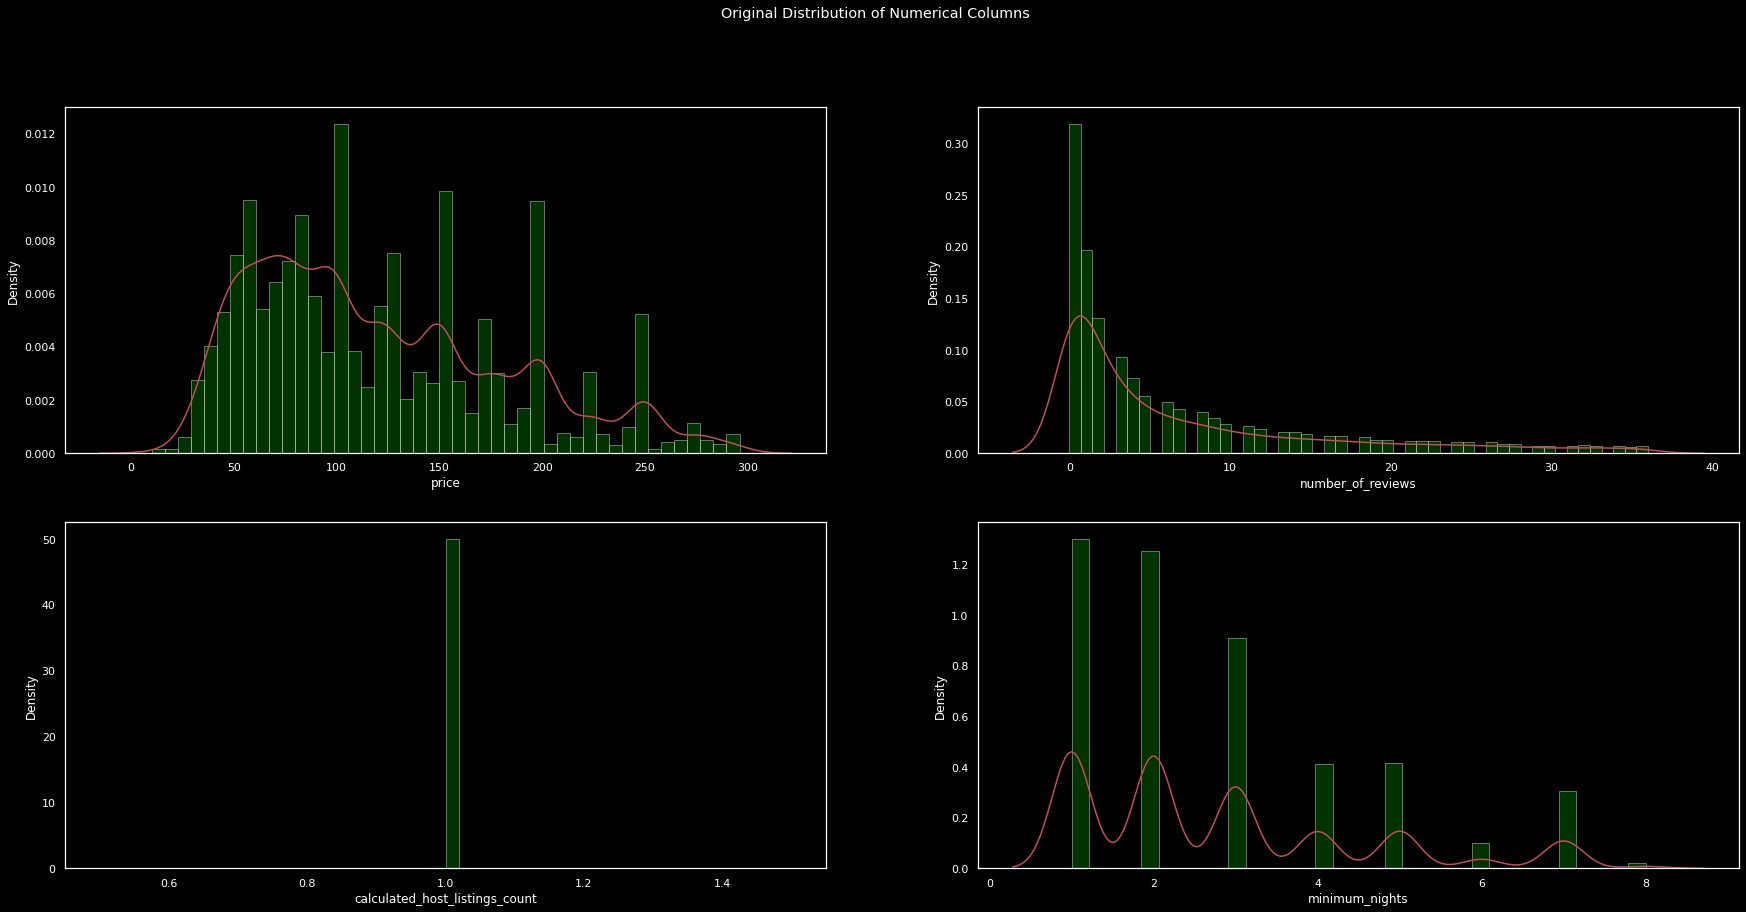

In [148]:
#setting subplots
fig, ax =plt.subplots(2,2,figsize=(30,14))
fig.suptitle('Original Distribution of Numerical Columns')
axis=0
j=0
for i in range(4):
  if i<2:
    sns.distplot(df_air_clean[num_col[i]],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][i])
  elif i>=2:
    axis=1
    sns.distplot(df_air_clean[num_col[i]],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][j])
    j=j+1
#show figure
fig.show()

__Important Numeric Column after Applying Central Limit Theorem__

In [149]:
#Applying central limit by defining sample size and number of samples
means = []
sample_size=70
number_of_samples=1500
np.random.seed(1)
#calculating mean of each smaples drawn
for column in num_col:
  x = [np.mean(np.random.choice(df_air_clean[column],sample_size)) for _i in range(number_of_samples)]
  means.append(x)

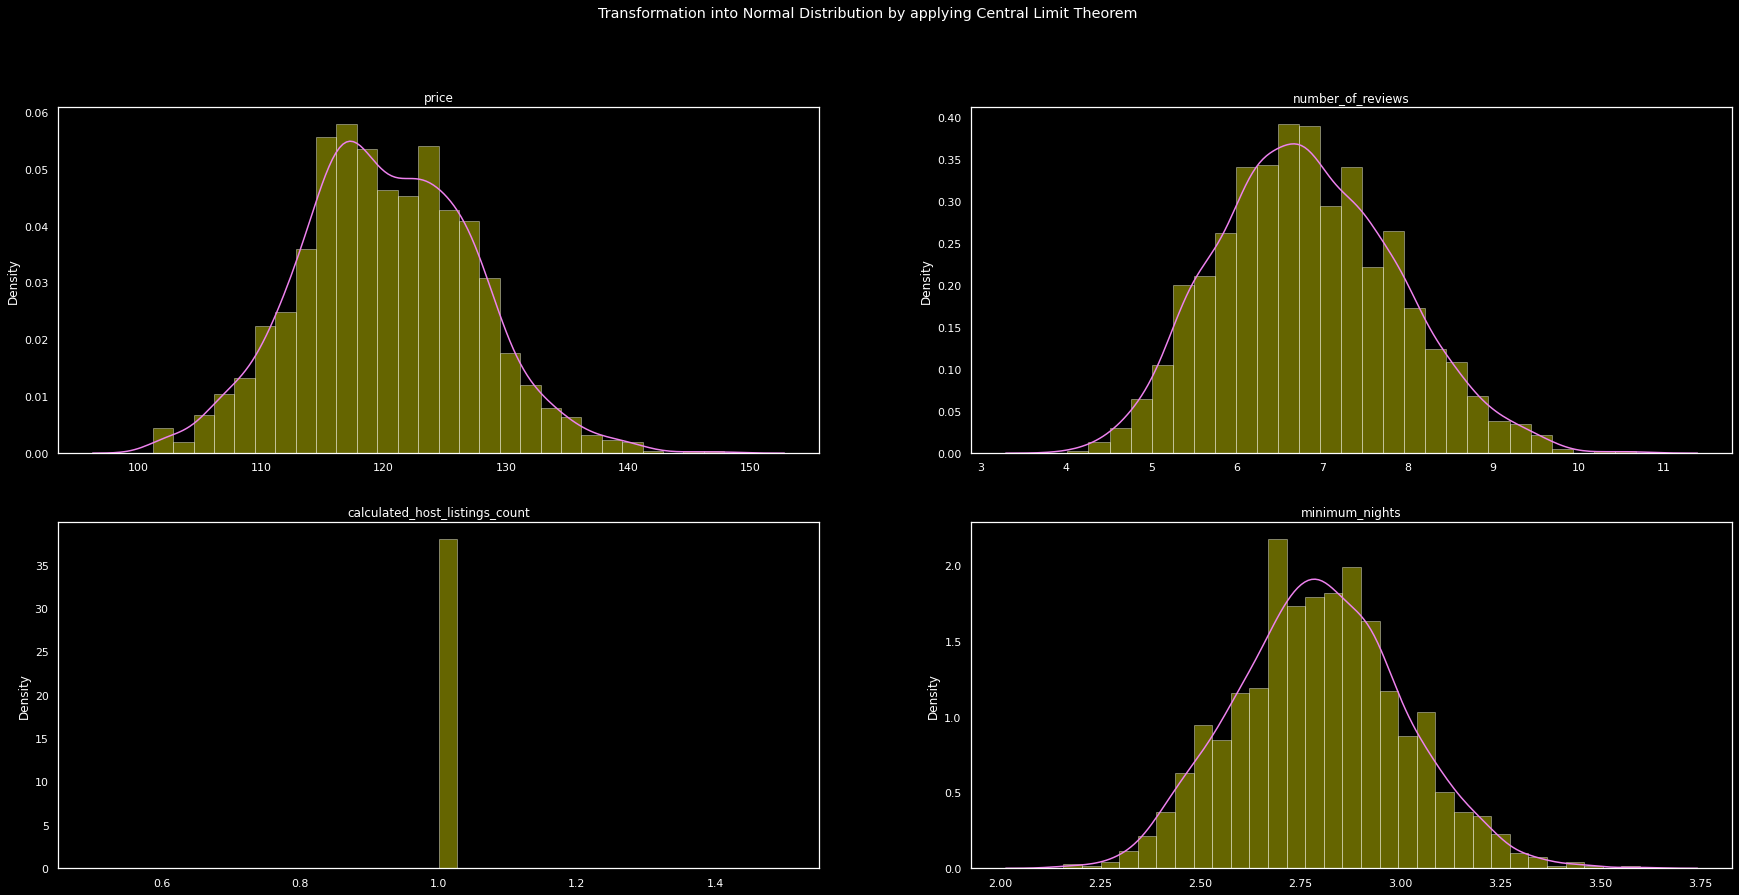

In [150]:
#setting subplots
fig, ax =plt.subplots(2,2,figsize=(30,14))
fig.suptitle('Transformation into Normal Distribution by applying Central Limit Theorem')
axis=0
j=0
for i in range(4):
  if i<2:
    sns.distplot(means[i],kde=True,color='yellow',kde_kws={'color':'violet'},ax=ax[axis][i]).set(title=num_col[i])
  elif i>=2:
    axis=1
    sns.distplot(means[i],kde=True,color='yellow',kde_kws={'color':'violet'},ax=ax[axis][j]).set(title=num_col[i])
    j=j+1
#show figure
fig.show()